In [ ]:
'''
To run this project click run on each section and see the result below under the section
This is final project for DSEM and below is the project for data analysis and visualisation for dataset:boston housing prediction
which is taken from https://lib.stat.cmu.edu/datasets (cmu website)A popular dataset in statistics and machine learning, 
the Boston Housing Dataset was first produced by the 1978 study "Hedonic Prices and the Demand for Clean Air." 
It has 506 observations, each of which represents a Boston neighborhood, and 13 traits that describe the neighborhood's socioeconomic,
environmental, and infrastructure characteristics. Using variables like the crime rate (`CRIM`), average number of rooms per residence ({RM`)
, proximity to highways ({RAD`), and the proportion of lower-status people (`LSTAT`), the objective is to forecast the median value of 
owner-occupied homes (`MEDV`), expressed in $1000s. Because it illustrates the connection between housing costs and elements 
like infrastructure, education, and air quality, this dataset is useful for regression modeling, exploratory data analysis, 
and urban planning.  Multicollinearity between features and a capped target variable are among the difficulties it poses, 
necessitating meticulous preprocessing procedures like scaling and outlier treatment.
The dataset is used as a standard for predictive modeling with methods like Random Forest and Linear Regression, 
and it is assessed using metrics like R-squared and Mean Squared Error (MSE).

meta data that is used here:
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''

In [127]:
#This is a python(.py) file run this in jupyter notebook for optimal execution
#run the block in a serial manner for the project to be executed properly
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Used for the visualization
sns.set(style="whitegrid")


In [129]:
# URL link for the dataset
url = "https://lib.stat.cmu.edu/datasets/boston"

# Fetching the dataset using requests
response = requests.get(url)
data_lines = response.text.splitlines()

# the first 22 lines of the dataset is metadata excluding the metadata
data_lines = data_lines[22:]

# Combine every two lines into a single row
data_values = []
for i in range(0, len(data_lines), 2):
    row1 = list(map(float, data_lines[i].split()))
    row2 = list(map(float, data_lines[i + 1].split()))
    data_values.append(row1 + row2)

# Define column names from the dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]

# Creating the DataFrame
data = pd.DataFrame(data_values, columns=columns)

data.to_csv('boston_housing.csv', index=False)

# Display the first five rows to show the dataset
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

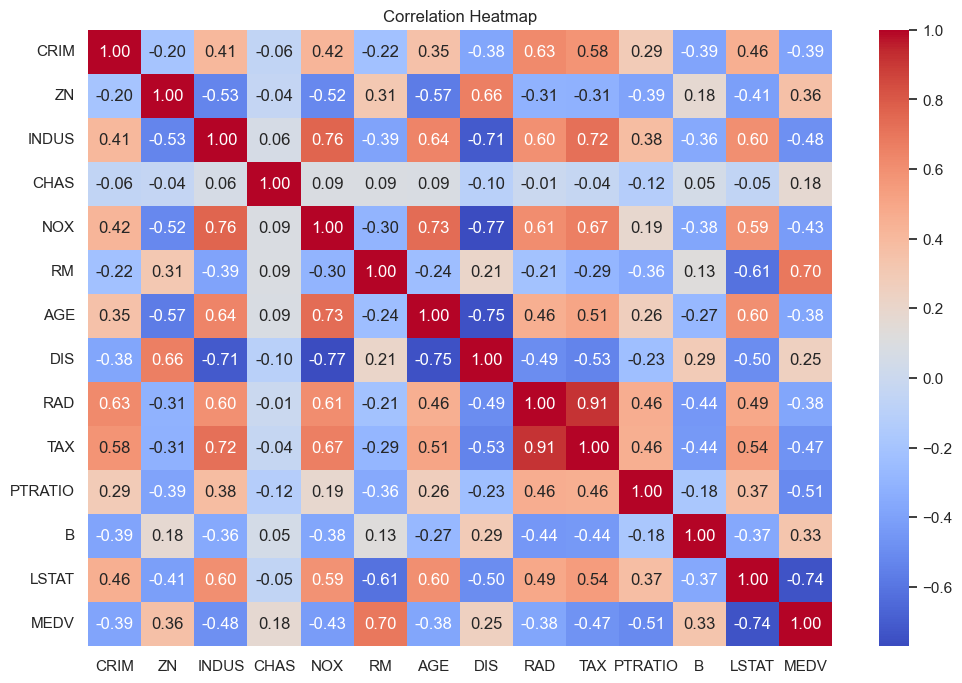

In [89]:
# General information
print(data.info())

# Descriptive statistics or 5 point summary
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Correlation heatmap for the data
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


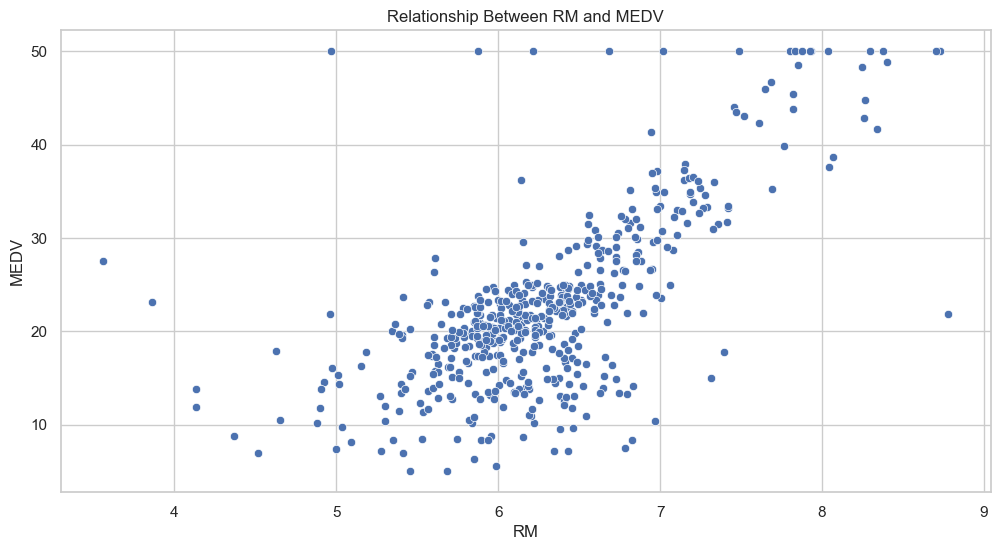

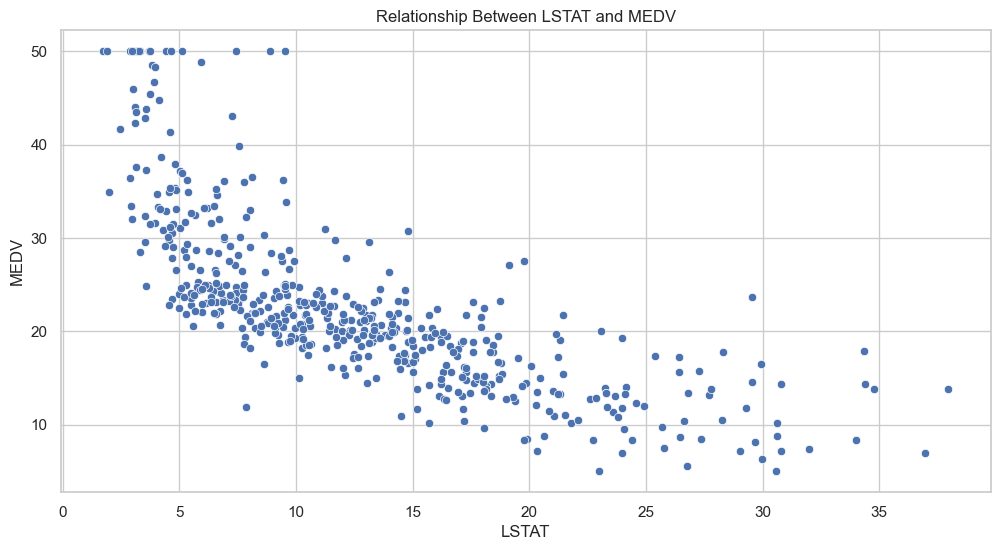

In [91]:
# Scatter plots for key variables which we got from the coorelation heatmap
plt.figure(figsize=(12, 6))
sns.scatterplot(x="RM", y="MEDV", data=data)
plt.title("Relationship Between RM and MEDV")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="LSTAT", y="MEDV", data=data)
plt.title("Relationship Between LSTAT and MEDV")
plt.show()


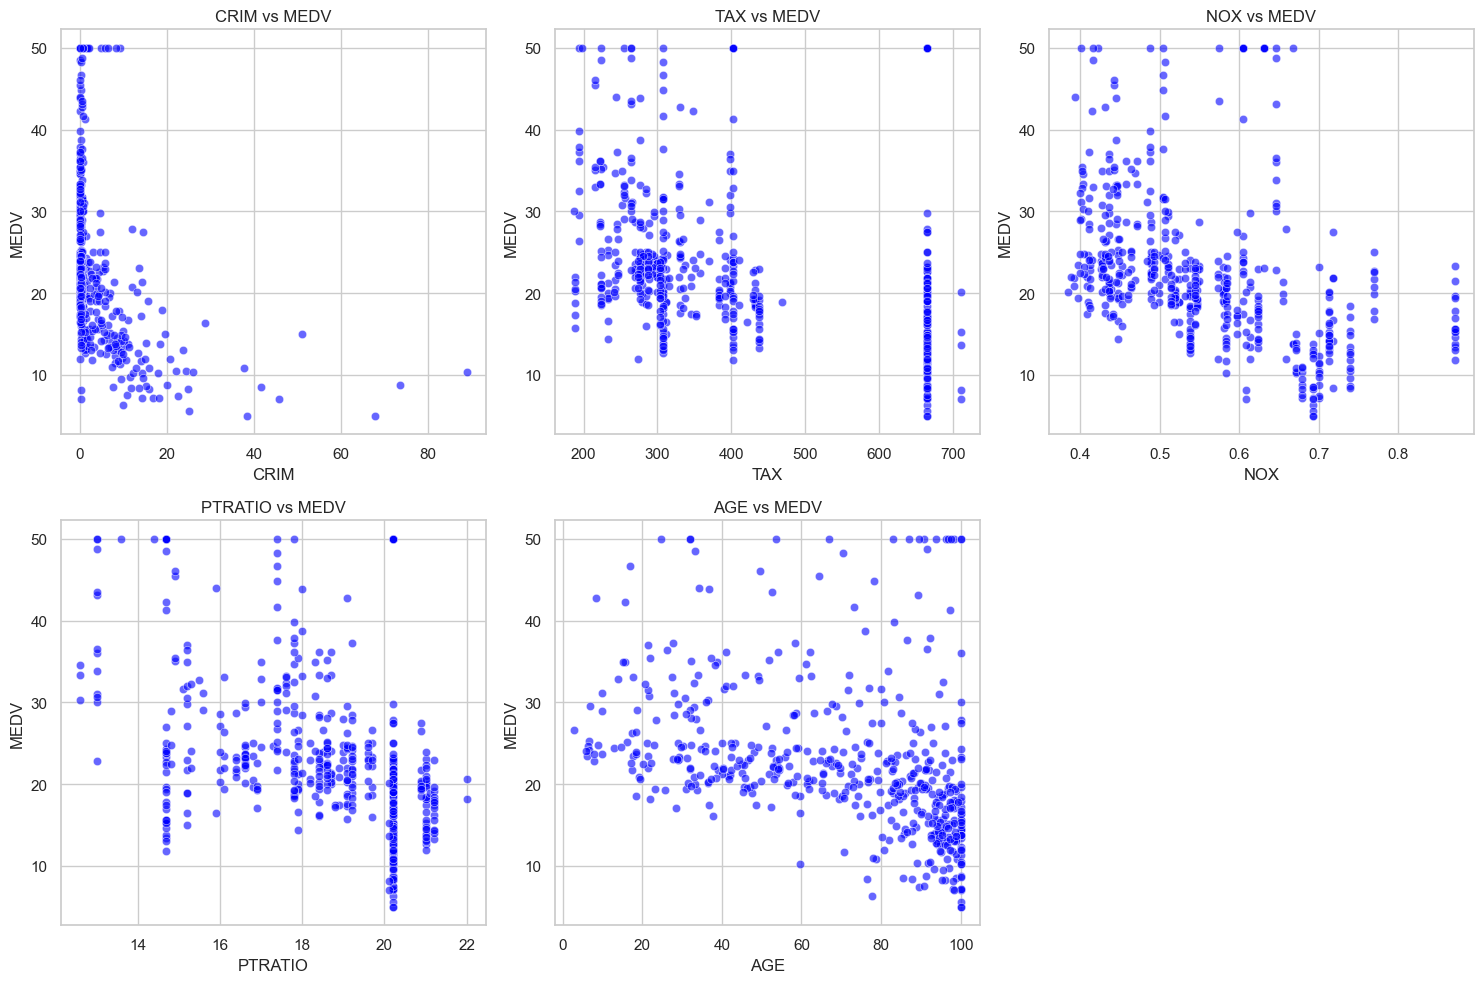

In [172]:
# Other features of the dataset
features = ["CRIM","TAX","NOX", "PTRATIO", "AGE"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each feature against MEDV(to check any coorelation)
for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y="MEDV", ax=axes[i], color="blue", alpha=0.6)
    axes[i].set_title(f"{feature} vs MEDV")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("MEDV")

# Remove empty subplot (if features < subplots)
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [152]:
# Split data into features and target(as we are testing the data with medv which is the target)
X = data.iloc[:, :-1]  # Features
y = data["MEDV"]       # Target

# Scale the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)


In [154]:
# Correlation with the target variable(medv)
print(data.corr()["MEDV"].sort_values(ascending=False))

# Linear regression example for RM(number of rooms)
slope, intercept, r_value, p_value, std_err = linregress(data["RM"], data["MEDV"])
print(f"Slope: {slope}, P-value: {p_value}, R-squared: {r_value**2}")


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64
Slope: 9.102108981180306, P-value: 2.487228871008377e-74, R-squared: 0.48352545599133356


In [156]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Random Forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# R-squared model
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print(f"R-squared: {r2:.4f}")

R-squared: 0.7451


In [158]:
# Evaluate models on the test set for linear regression and random forest generator and r-squared
models = {"Linear Regression": lr, "Random Forest": rf}

for name, model in models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")
    print(f"{name} R-squared: {r2}")

Linear Regression MSE: 21.953471731537107
Linear Regression R-squared: 0.745143064291957
Random Forest MSE: 14.832536460784308
Random Forest R-squared: 0.745143064291957


In [160]:
#Perform cross-validation for random forest with MSE and R-squared
for name, model in models.items():
    #MSE
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
    print(f"{name} Cross-Validation MSE: {-mse_scores.mean()}")
    #R-squared
    r2_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
    print(f"{name} Cross-Validation R-squared: {r2_scores.mean()}")

Linear Regression Cross-Validation MSE: 37.13180746769892
Linear Regression Cross-Validation R-squared: 0.35327592439588196
Random Forest Cross-Validation MSE: 21.330111843311965
Random Forest Cross-Validation R-squared: 0.6275618561317774


In [162]:
# GridSearchCV for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation MSE:", -grid_search.best_score_)

# Perform GridSearchCV for R-squared as well
grid_search_r2 = GridSearchCV(rf, param_grid, cv=5, scoring="r2")
grid_search_r2.fit(X_train, y_train)

print("Best Parameters for R-squared:", grid_search_r2.best_params_)
print("Best Cross-Validation R-squared:", grid_search_r2.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Cross-Validation MSE: 8.961879492962963
Best Parameters for R-squared: {'max_depth': None, 'n_estimators': 200}
Best Cross-Validation R-squared: 0.888764305092618


Random Forest MSE: 14.612746862745103
Random Forest R-squared: 0.8303612324620794
Linear Regression MSE: 21.953471731537107
Linear Regression R-squared: 0.745143064291957


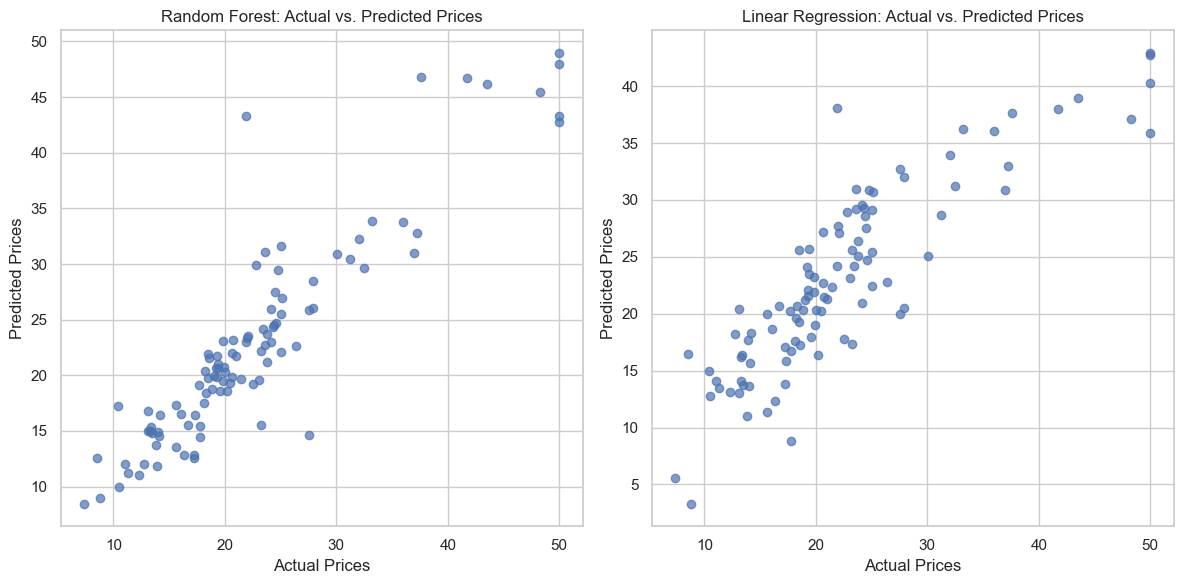

In [165]:
# Use the best model (Random Forest) with the best parameters
final_rf_model = grid_search.best_estimator_

# Make predictions on the test set
rf_predictions = final_rf_model.predict(X_test)

# Evaluate performance using MSE and R-squared for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = final_rf_model.score(X_test, y_test)

# Evaluate performance using Linear Regression for comparison
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = lr.score(X_test, y_test)

# Display the results
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R-squared: {lr_r2}")

# Plot Actual vs. Predicted prices for both models
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs. Predicted Prices")

# Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_predictions, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")

plt.tight_layout()
plt.show()


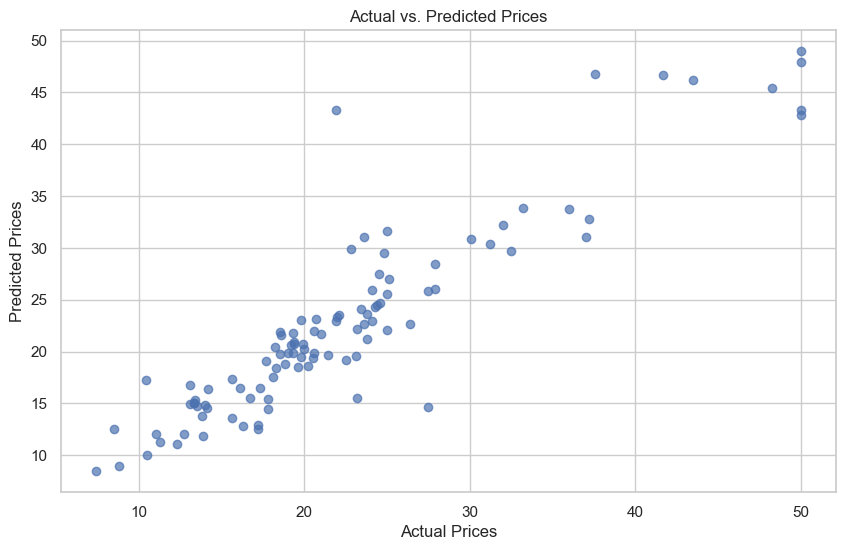

In [166]:
# Final model: Use the best parameters from GridSearch(random forest regression)
final_model = grid_search.best_estimator_

# Predict on test set
y_pred = final_model.predict(X_test)

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


In [ ]:
'''Predicted the value of houses using the factors RM(average number of rooms per dwelling) and LSTAT(% lower status of the population) to calculate MEDV(Median value of owner-occupied homes in $1000's) 
and the reulsts are verified using EDA and comparing the values between Random Forest and Linear Regression.'''